In [209]:
from environment import State, Environment, distance
from environment import DEFAULT_START_ST, DEFAULT_GOAL_ST, DEFAULT_CONFIG, SIMPLE_CONFIG, HARD_CONFIG
from lazy_rrg import LazyRRGPlanner
from prm import PRMStar
from utils import compute_path_cost

import random
import json

import numpy as  np
import matplotlib.pyplot as plt

SEED=42
random.seed(SEED)
np.random.seed(SEED)

### Environment Configuration

In [203]:
start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)


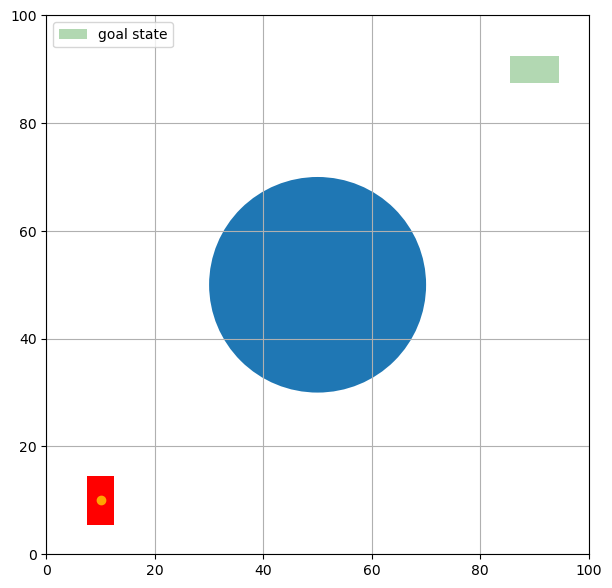

In [210]:
env = Environment.from_config(start_state, DEFAULT_CONFIG)
env.render(goal_state=State(*DEFAULT_GOAL_ST))

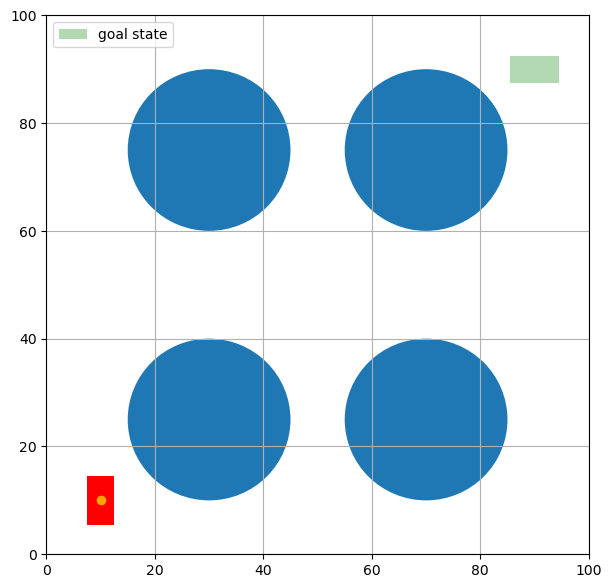

In [204]:
env = Environment.from_config(start_state, SIMPLE_CONFIG)
env.render(goal_state=State(*DEFAULT_GOAL_ST))

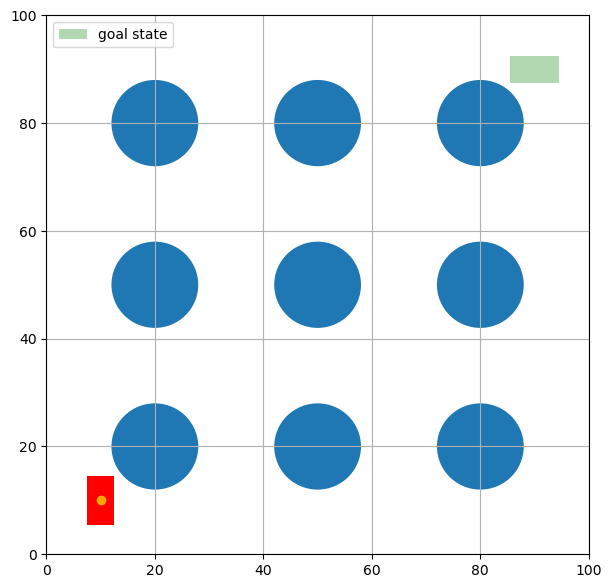

In [205]:
env = Environment.from_config(start_state, HARD_CONFIG)
env.render(goal_state=State(*DEFAULT_GOAL_ST))

# Planning algorithm experiments

## Experiments with  Lazy-RRG* Planner

In [142]:
def uniform_environment_sampler():
    x = np.random.uniform(0, env._env_size[0])
    y = np.random.uniform(0, env._env_size[1])
    angle = np.random.uniform(-180, 180)
    return State(np.array([x, y]), angle)

In [ ]:
planner = LazyRRGPlanner(
    env,
    distance_fn=distance,
    env_sampler=uniform_environment_sampler,
    k=15,
    max_move_step=20,
    max_angle_step=15
)

rrg_path = planner.plan(
    start_state=start_state,
    goal_state=goal_state,
    N=10,
    naive=False
)

In [ ]:
print(len(planner.G_lazy), len(planner.G))

5 1


In [177]:
planner.predecessors[start_state], planner.predecessors[goal_state]

([None, None], [None, None])

In [152]:
len(rrg_path)

1

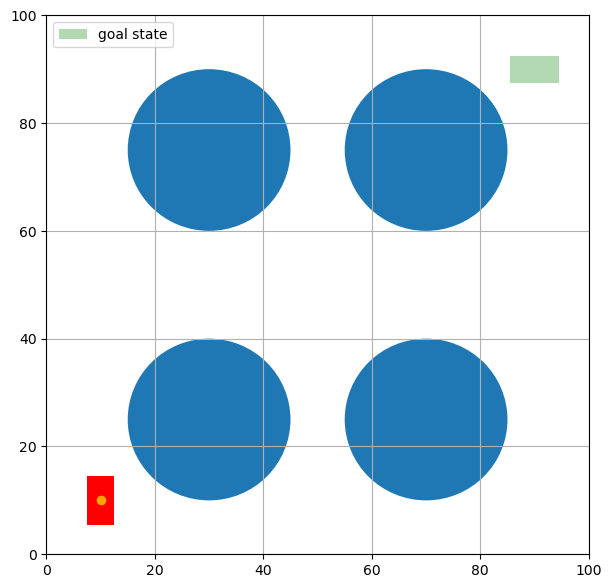

In [153]:
env.render(goal_state=rrg_path[-1], path=rrg_path)
plt.show()

## Experiments with PRM*

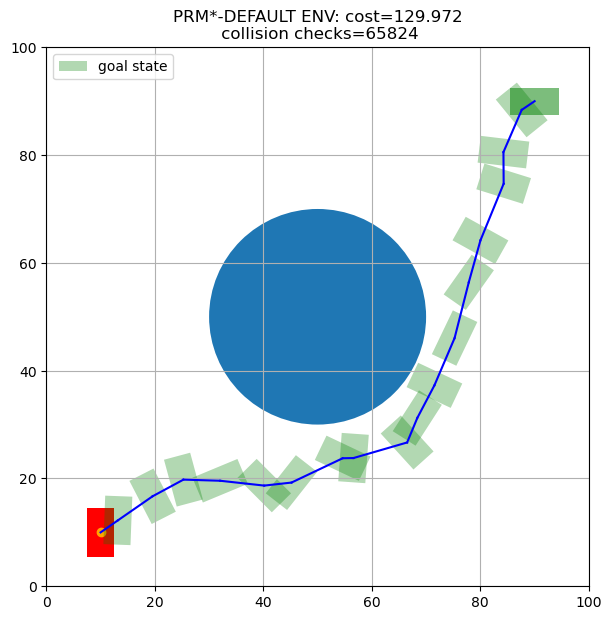

In [221]:
env = Environment.from_config(State(*DEFAULT_START_ST), DEFAULT_CONFIG)
prm_star = PRMStar(env, num_samples=500, k=15)

start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)

col_checks = prm_star.build_roadmap(start_state, goal_state)

path = prm_star.find_path(start_state, goal_state)

# Visualization
prm_star.render(
    path, title=f"PRM*-DEFAULT ENV: cost={compute_path_cost(path):.3f}\n collision checks={col_checks}")

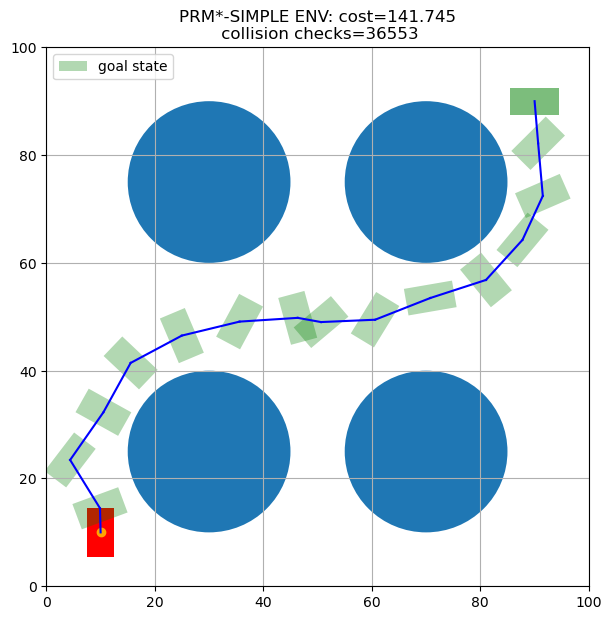

In [223]:
env = Environment.from_config(State(*DEFAULT_START_ST), SIMPLE_CONFIG)
prm_star = PRMStar(env, num_samples=500, k=15)

start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)

col_checks = prm_star.build_roadmap(start_state, goal_state)

path = prm_star.find_path(start_state, goal_state)

# Visualization
prm_star.render(path, title=f"PRM*-SIMPLE ENV: cost={compute_path_cost(path):.3f}\n collision checks={col_checks}")

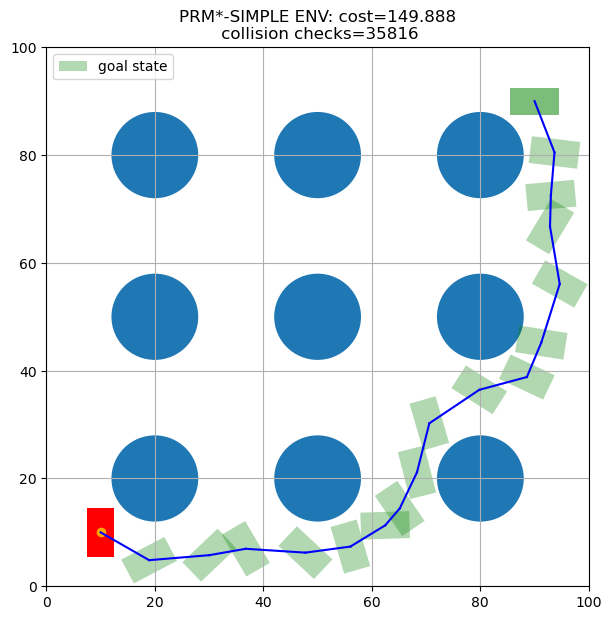

In [227]:
env = Environment.from_config(State(*DEFAULT_START_ST), HARD_CONFIG)
prm_star = PRMStar(env, num_samples=500, k=15)

start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)
col_checks = prm_star.build_roadmap(start_state, goal_state)

path = prm_star.find_path(start_state, goal_state)

# Visualization
prm_star.render(
    path, title=f"PRM*-SIMPLE ENV: cost={compute_path_cost(path):.3f}\n collision checks={col_checks}")